<a href="https://colab.research.google.com/github/Abree1234/CodeAlpha_ProjectName/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Standard Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning - Forecasting (Optional)
from statsmodels.tsa.arima.model import ARIMA

# For mounting Google Drive (to access files)
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:



# Define column names manually since the CSV has no header row
columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
           'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unemployment in India.csv', names=columns, header=None, skiprows=1)

print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


Data Cleaning

In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract state name from Region
df['State'] = df['Region'].str.split(',').str[0].str.strip()

# Convert numeric columns
numeric_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed',
                'Estimated Labour Participation Rate (%)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

<ipython-input-7-1622153474>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


###Feature Extraction

In [ ]:
# Add Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month

print("Cleaned DataFrame:")
print(df.head())

Cleaned DataFrame:
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  \
0          11999139.0                                    43.24  Rural   
1          11755881.0                                    42.05  Rural   
2          12086707.0                                    43.50  Rural   
3          12285693.0                                    43.97  Rural   
4          12256762.0                                    44.68  Rural   

            State    Year      Month  Month_Num  
0  Andhra Pradesh  2019.0        May     

###EDA

In [ ]:

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06                

Distribution of unemployment rate

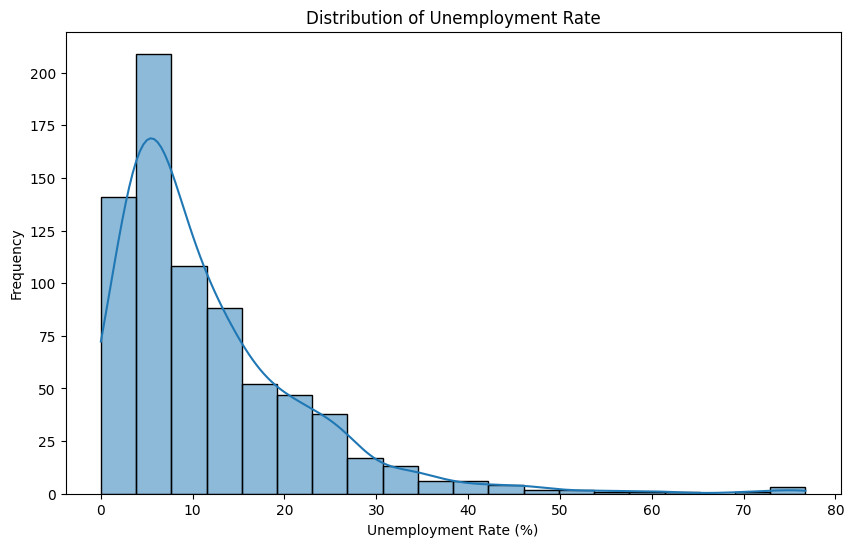

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

Correlation between variable

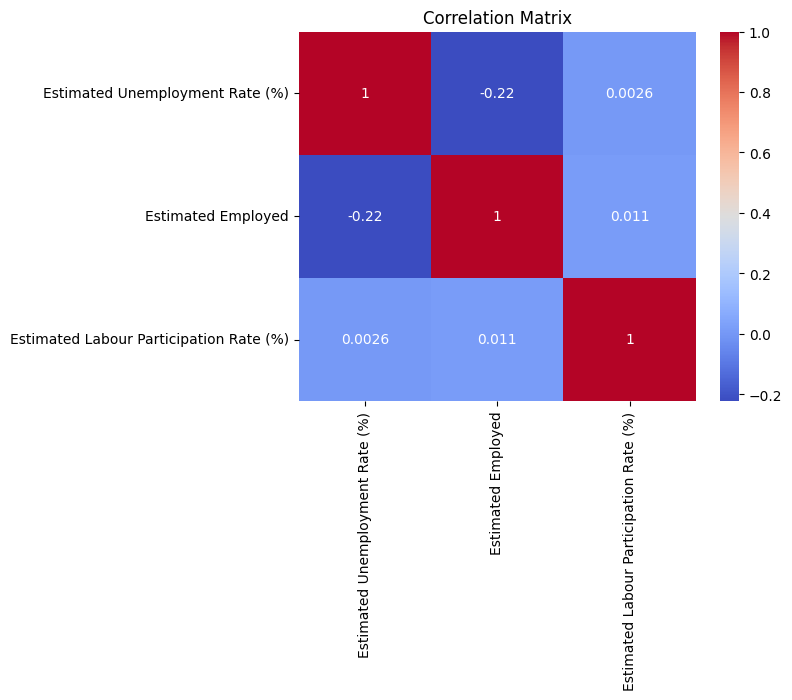

In [ ]:

corr = df[['Estimated Unemployment Rate (%)', 'Estimated Employed',
          'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Visualization of unemployment trend

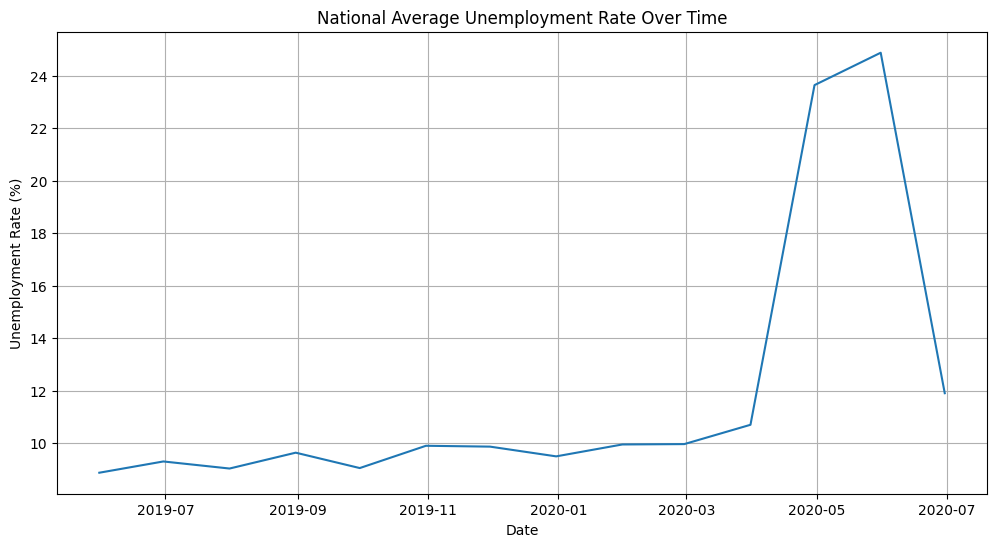

In [ ]:
#national_trend= df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
national_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=national_trend, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

Top 10 state by unemployment

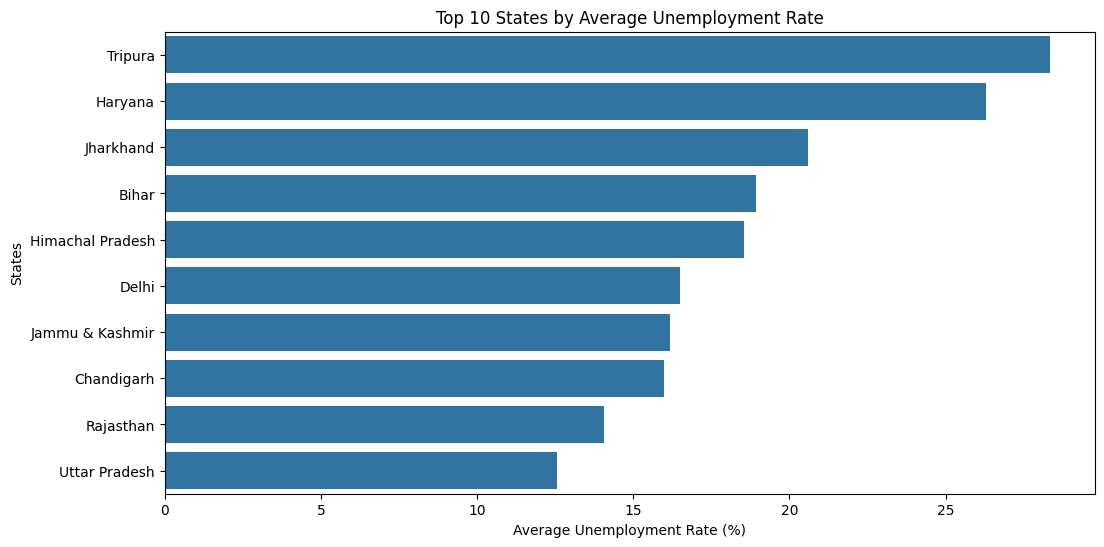

In [ ]:

state_avg = df.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=state_avg.values, y=state_avg.index)
plt.title('Top 10 States by Average Unemployment Rate')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('States')
plt.show()

Investigate impact of covid-19


Pre-COVID Avg U-Rate: 10.20%
Post-COVID Avg U-Rate: 20.19%


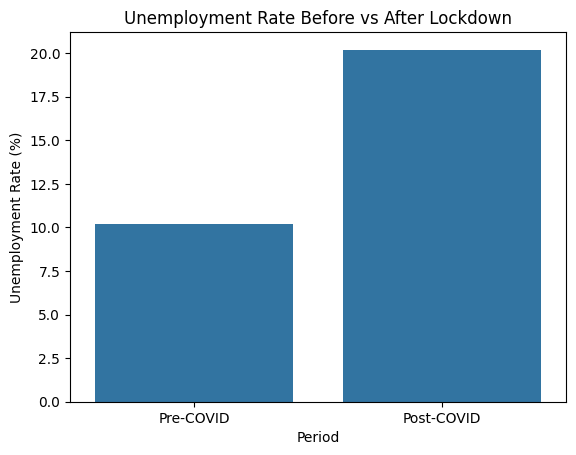

In [ ]:

# Pre-COVID baseline: Jan-Mar 2020
pre_covid = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-03-31')]
# Post-lockdown: April 2020 onwards
post_covid = df[df['Date'] >= '2020-04-01']

avg_pre = pre_covid['Estimated Unemployment Rate (%)'].mean()
avg_post = post_covid['Estimated Unemployment Rate (%)'].mean()

print(f"\nPre-COVID Avg U-Rate: {avg_pre:.2f}%")
print(f"Post-COVID Avg U-Rate: {avg_post:.2f}%")

# Plot comparison
comparison = pd.DataFrame({
    'Period': ['Pre-COVID', 'Post-COVID'],
    'Avg Unemployment Rate (%)': [avg_pre, avg_post]
})

sns.barplot(x='Period', y='Avg Unemployment Rate (%)', data=comparison)
plt.title('Unemployment Rate Before vs After Lockdown')
plt.ylabel('Unemployment Rate (%)')
plt.show()

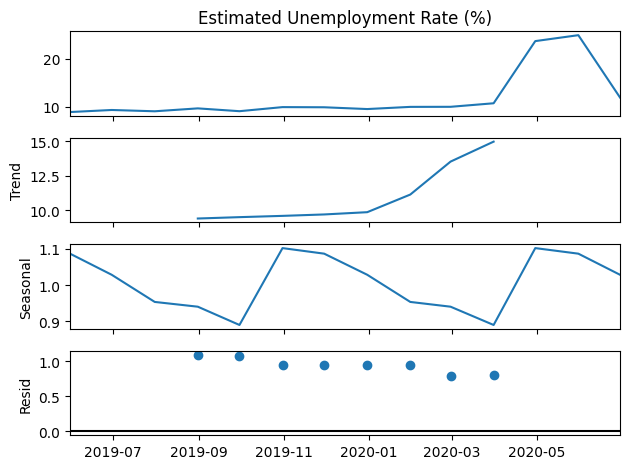

In [ ]:

# Keep as Series with Date as index
national_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Decompose with proper period (must be ≤ len of Series / 2)
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(national_trend, model='multiplicative', period=6)

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()

Identity key patterns and seasons
 from a plot bellow we see unemployment rise sharply from early 2020 peaking by may

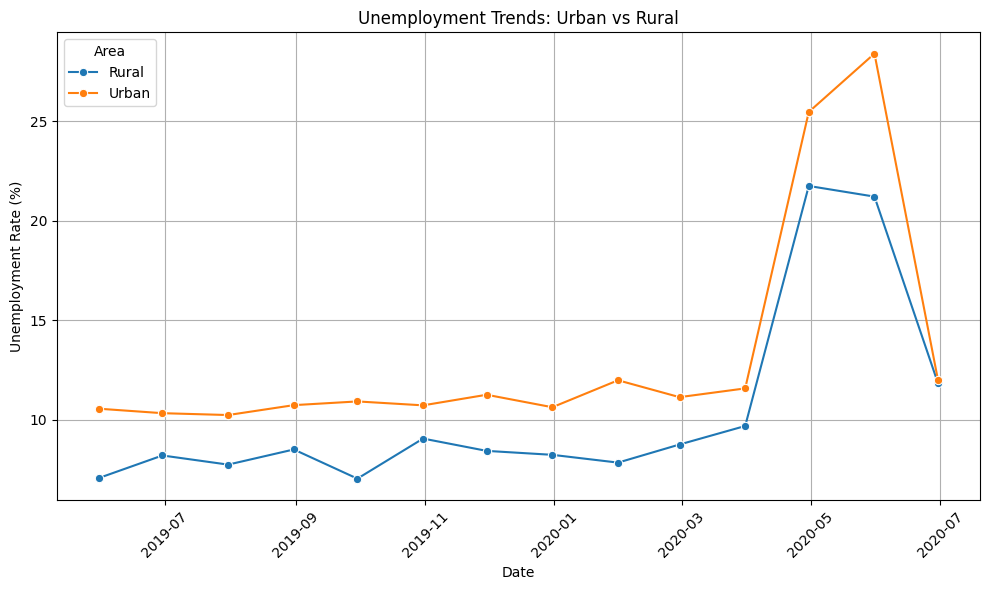

In [ ]:

# Convert Date column to datetime if not done
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group by Date and Area
area_trend = df.groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Plot again
plt.figure(figsize=(10, 6))
sns.lineplot(data=area_trend, x='Date', y='Estimated Unemployment Rate (%)', hue='Area', marker='o')
plt.title('Unemployment Trends: Urban vs Rural')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Forecasted unemployment rates:
 2020-07-31    10.221760
2020-08-31    10.931895
2020-09-30    10.632050
Freq: ME, Name: predicted_mean, dtype: float64


<ipython-input-18-520412888>:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


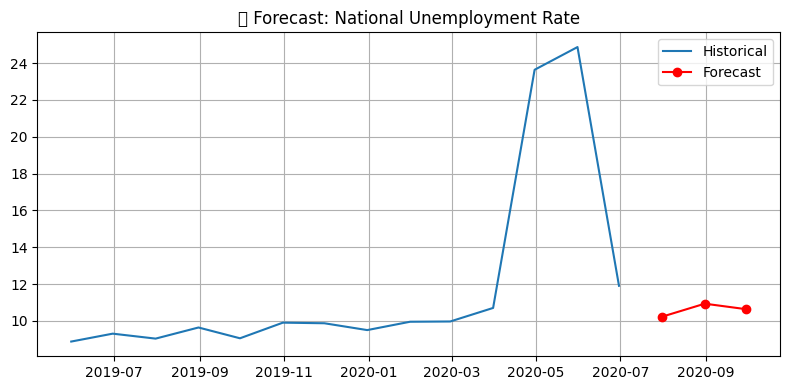

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to national unemployment
model = ARIMA(national_trend, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("Forecasted unemployment rates:\n", forecast)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(national_trend, label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', marker='o', color='red')
plt.title('📉 Forecast: National Unemployment Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 COVID-19 had a significant, sharp impact on unemployment rates starting early 2020.

 Seasonal decomposition revealed cyclic patterns — useful for short-term labor policy timing.

 Rural vs Urban split shows different recovery trajectories — suggest localized interventions.

 Correlation across states can inform region-wise support plans and economic coordination.

 Forecasting shows the potential for predictive economic management using TS tools.